<a href="https://colab.research.google.com/github/FjRabbi/Multiple-Sclerosis-Disease-Prediction-ML/blob/main/Multiple_Sclerosis_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Multiple Sclerosis Disease Prediction using ML approaches



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Projects/Multiple Sclerosis Disease Prediction/Syndrome_to_multiple_sclerosis.csv')
data

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1,1,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2,2,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1,1,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1,1,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,3,3,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,1,1,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,2,2,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,2,2,2


Data Visualization

In [ ]:
# Shape of the dataset
data.shape

(273, 20)

In [ ]:
# Viewing the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [ ]:
# Changing some of the data into categorical
gender = {1:'Male', 2: 'Female'}
breastfeeding = {1: 'yes', 2:'no', 3:'unknown'}
varicella = {1 : 'positive', 2: 'negative', 3: 'unknown'}
group = {1: 'CDMS' , 2: 'Non-CDMS' }

# Mapping the dataset
data['Gender'] = data['Gender'].map(gender)
data['Breastfeeding'] = data['Breastfeeding'].map(breastfeeding)
data['Varicella'] = data['Varicella'].map(varicella)
data['group'] = data['group'].map(group)

In [ ]:
# Let's look at the columns dtypes again
print(data.dtypes)
print('-' * 40)
print(df.dtypes)

Gender                     object
Age                         Int64
Schooling                   Int64
Breastfeeding              object
Varicella                  object
Initial_Symptom             Int64
Mono_or_Polysymptomatic     Int64
Oligoclonal_Bands           Int64
LLSSEP                      Int64
ULSSEP                      Int64
VEP                         Int64
BAEP                        Int64
Periventricular_MRI         Int64
Cortical_MRI                Int64
Infratentorial_MRI          Int64
Spinal_Cord_MRI             Int64
Initial_EDSS                Int64
Final_EDSS                  Int64
group                      object
dtype: object
----------------------------------------
Gender                     Int64
Age                        Int64
Schooling                  Int64
Breastfeeding              Int64
Varicella                  Int64
Initial_Symptom            Int64
Mono_or_Polysymptomatic    Int64
Oligoclonal_Bands          Int64
LLSSEP                     Int64
UL

In [ ]:
# Missing Variables
df.isnull().sum()

Gender                     0
Age                        0
Schooling                  1
Breastfeeding              0
Varicella                  0
Initial_Symptom            1
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
Initial_EDSS               0
Final_EDSS                 0
group                      0
dtype: int64

In [ ]:
# Duplicate Variables
df.duplicated().sum()

0

In [ ]:
# Summary for numerical data
data.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,273.0,34.062271,11.114369,15.0,25.0,33.0,40.0,77.0
Schooling,272.0,15.176471,4.244175,0.0,12.0,15.0,20.0,25.0
Initial_Symptom,272.0,6.430147,4.222009,1.0,3.0,6.0,9.0,15.0
Mono_or_Polysymptomatic,273.0,1.725275,0.494066,1.0,1.0,2.0,2.0,3.0
Oligoclonal_Bands,273.0,0.358974,0.558426,0.0,0.0,0.0,1.0,2.0
LLSSEP,273.0,0.424908,0.495237,0.0,0.0,0.0,1.0,1.0
ULSSEP,273.0,0.369963,0.483681,0.0,0.0,0.0,1.0,1.0
VEP,273.0,0.307692,0.462386,0.0,0.0,0.0,1.0,1.0
BAEP,273.0,0.065934,0.248623,0.0,0.0,0.0,0.0,1.0
Periventricular_MRI,273.0,0.505495,0.500888,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Summary for the categorical data
data.describe(exclude=np.number).T

,count,unique,top,freq
Gender,273,2,Female,168
Breastfeeding,273,3,yes,131
Varicella,273,3,positive,124
group,273,2,Non-CDMS,148


In [ ]:
# Univariate Analysis with histograms and boxplots
def histogram_boxplot(data, feature, figsize=(12,7), kde=False, bins=None):
    #Creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    #Creating a boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color='violet'
    )

    #Creating a histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='winter'
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )

    #Creating a line for mean
    ax_hist2.axvline(data[feature].mean(), color='green', linestyle='--')

    #Creating a line for the median
    ax_hist2.axvline(data[feature].median(), color='black', linestyle='-')

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, 

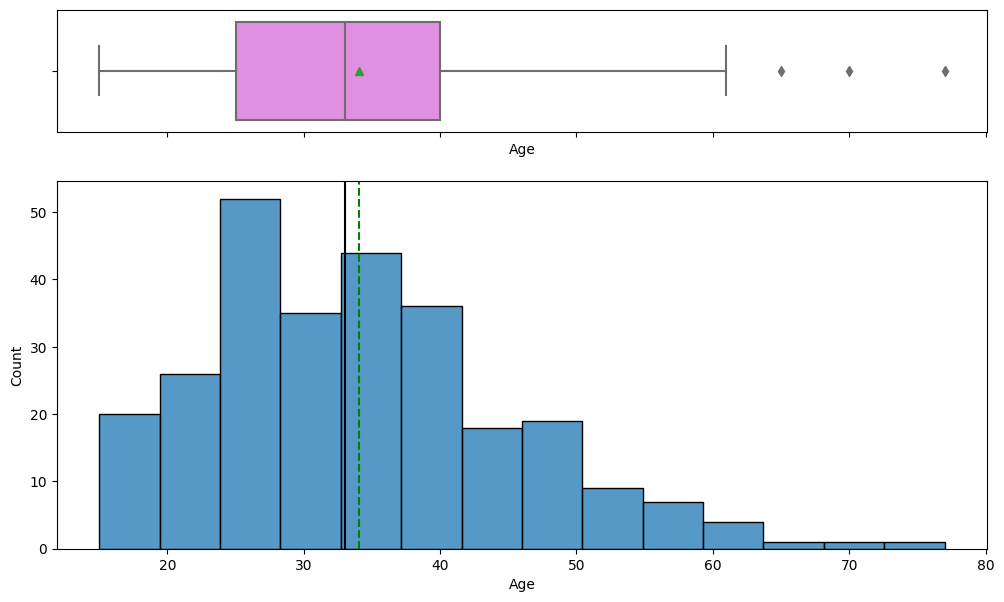

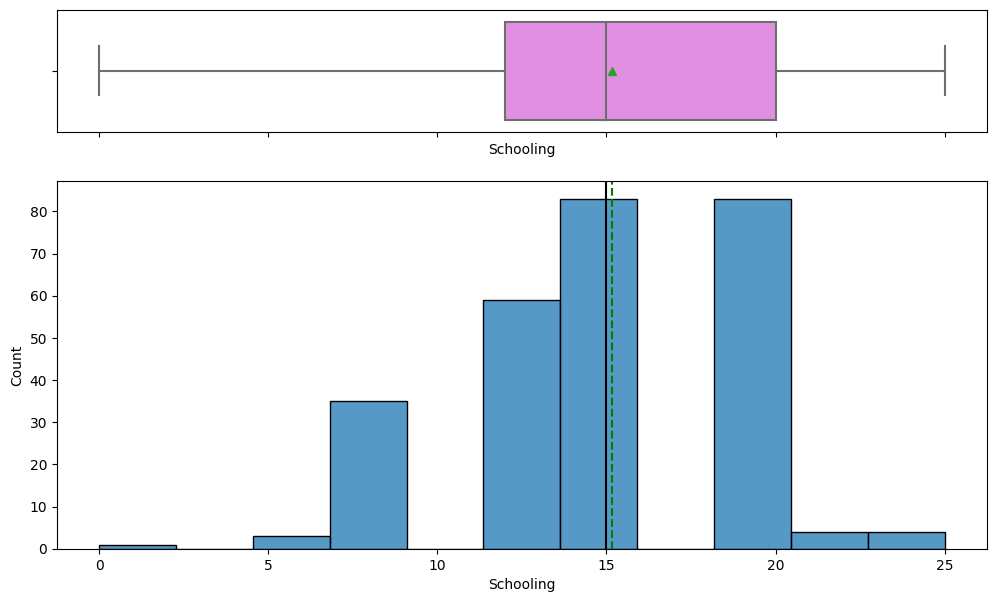

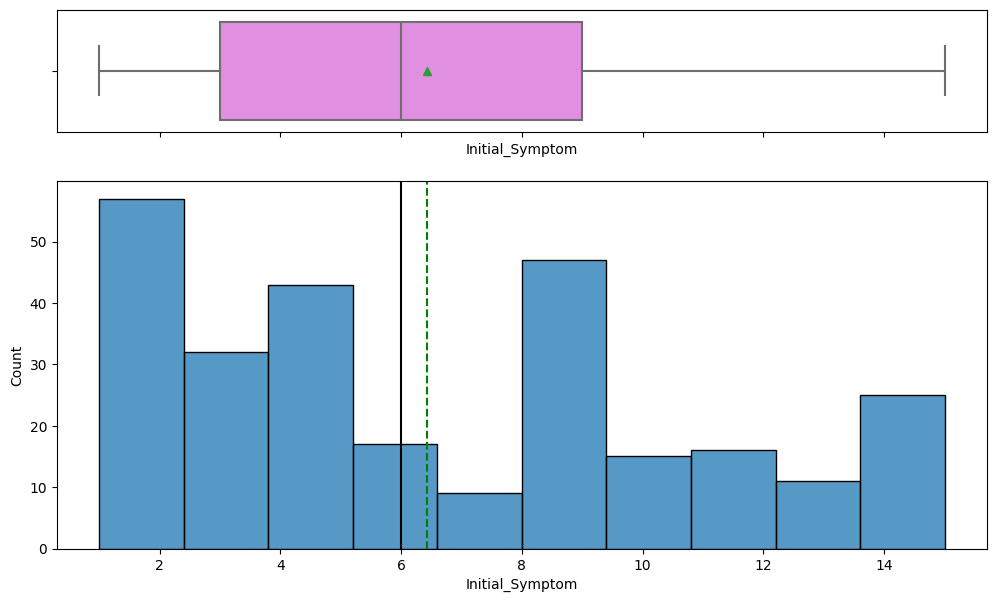

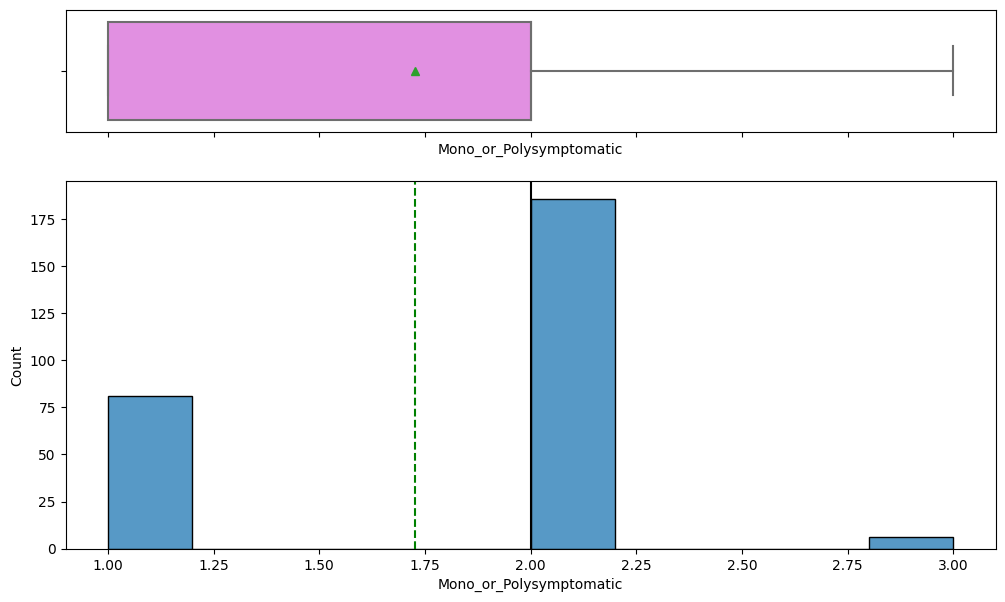

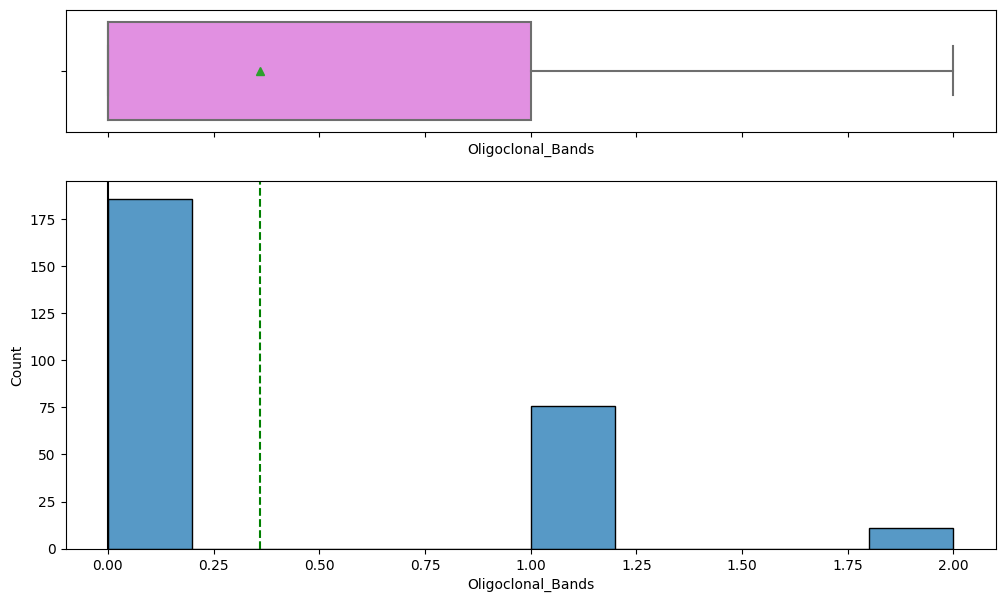

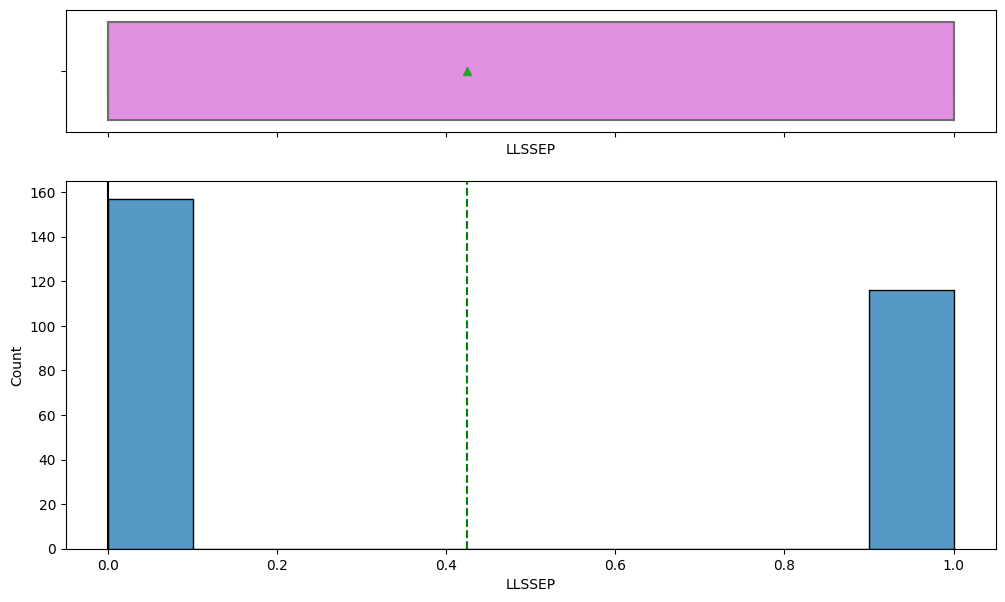

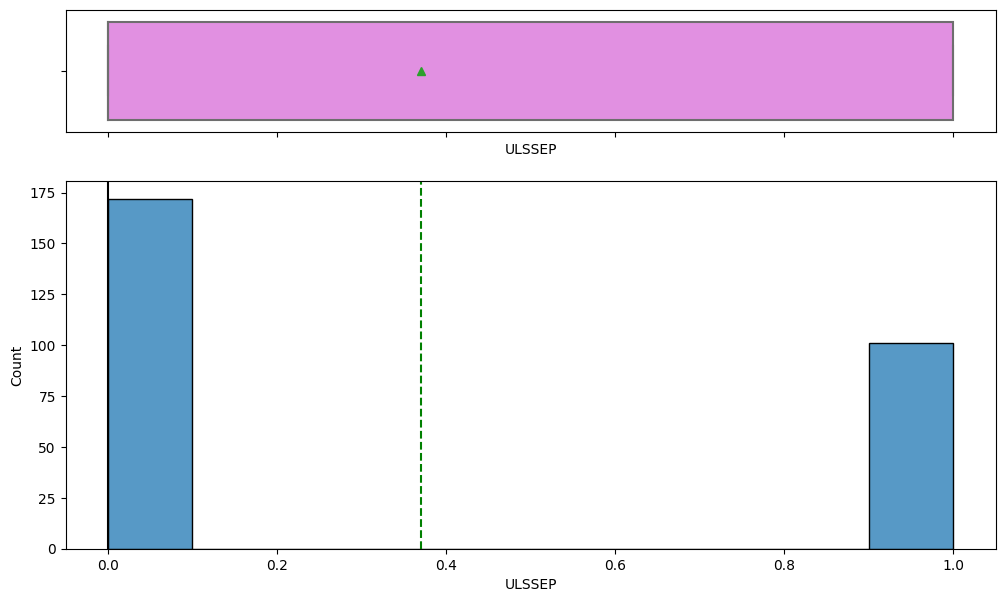

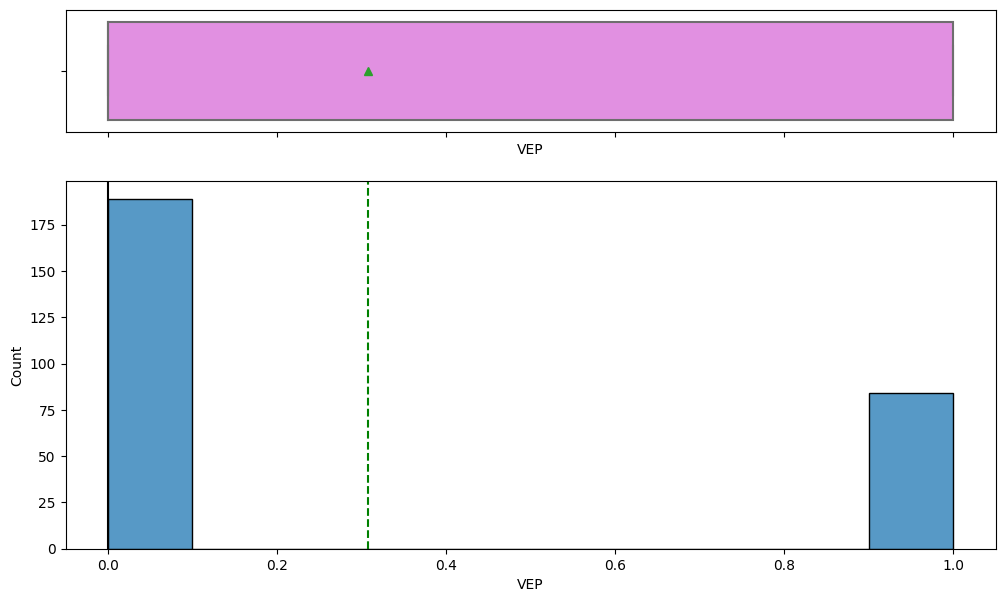

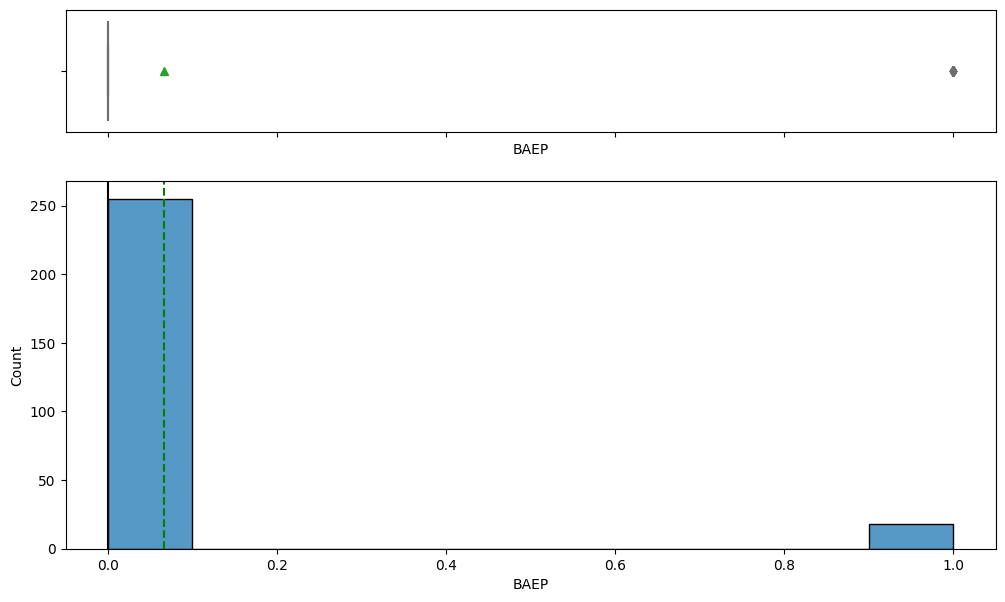

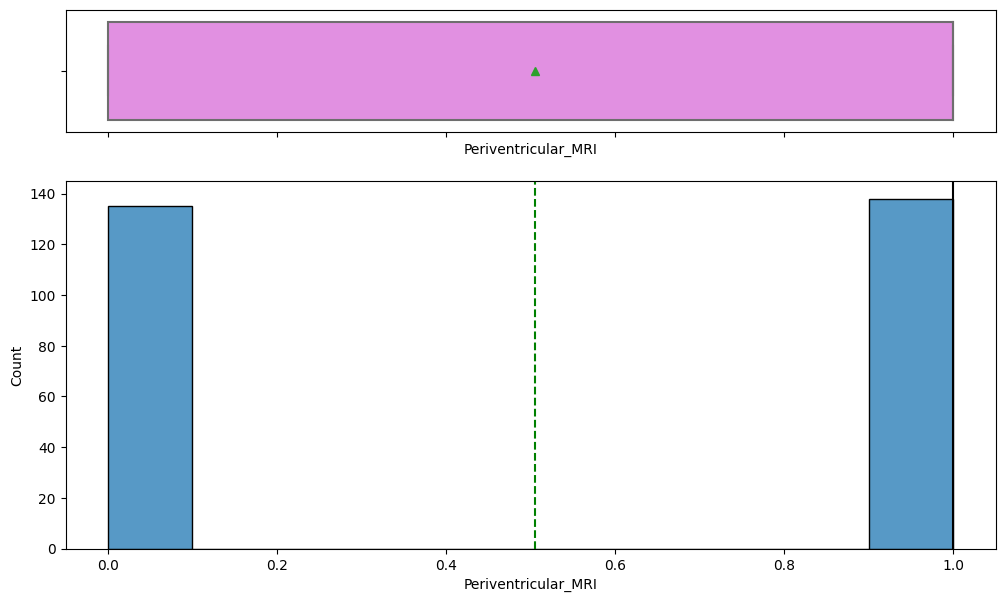

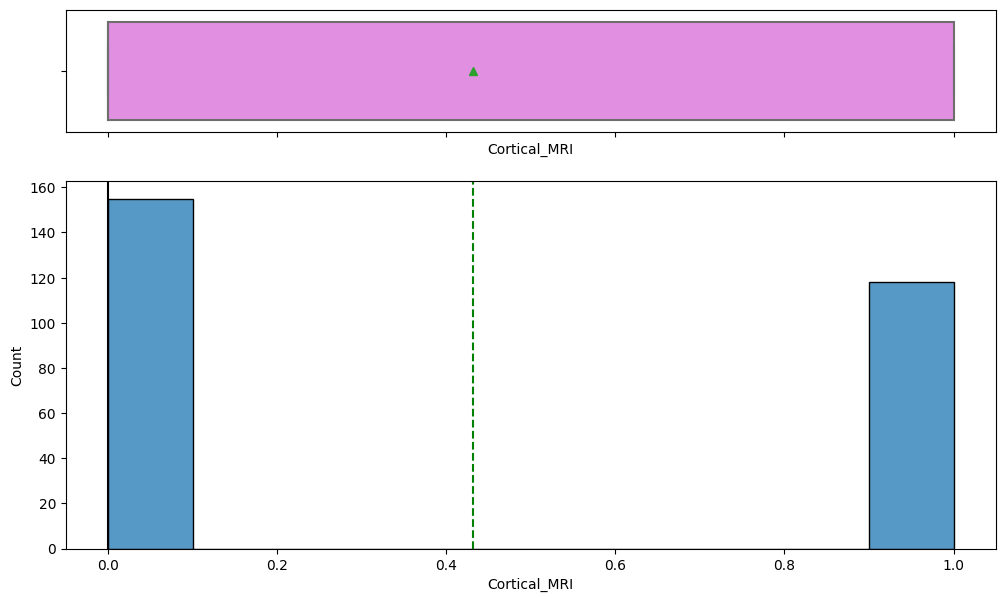

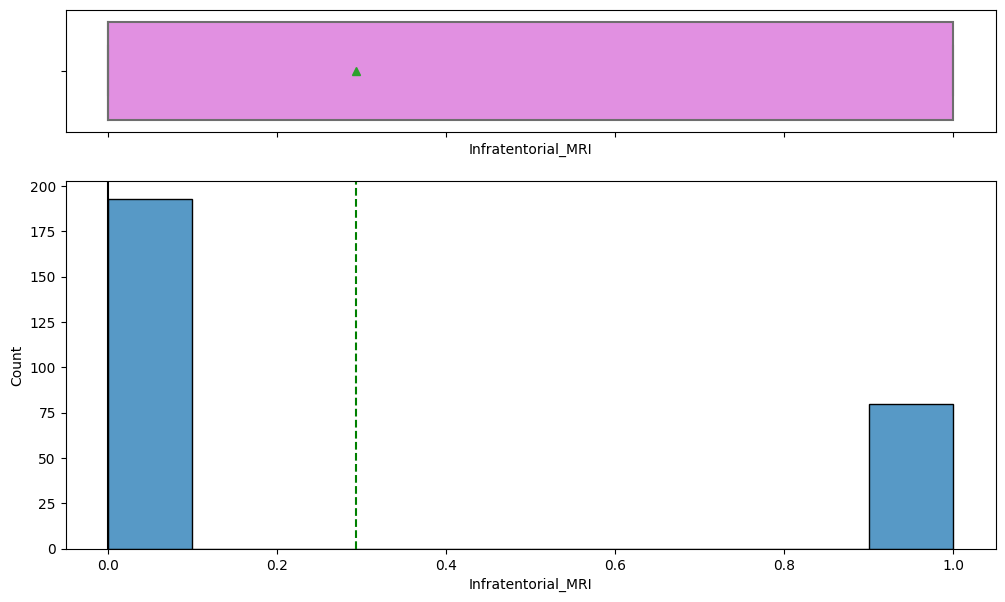

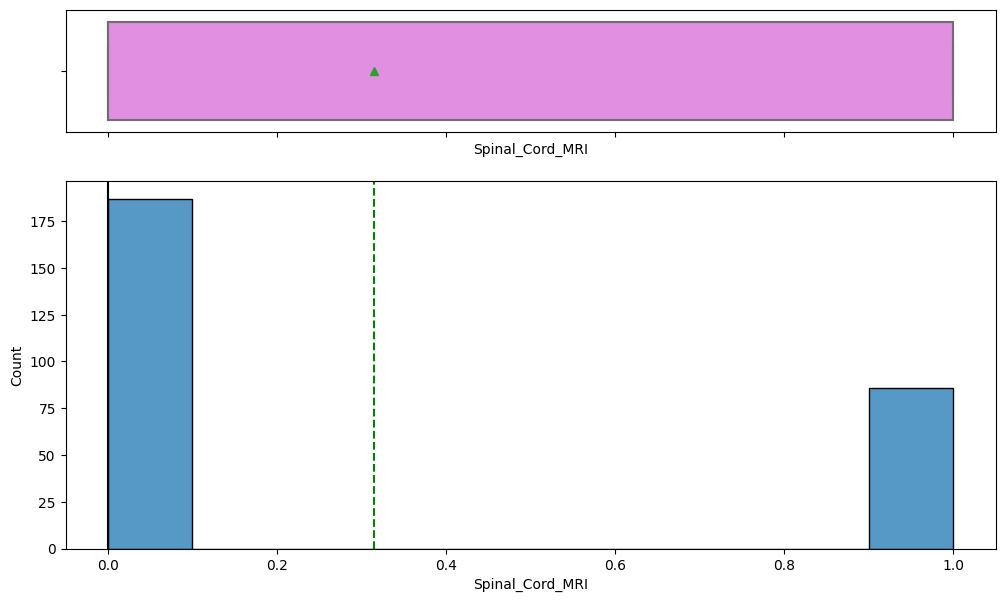

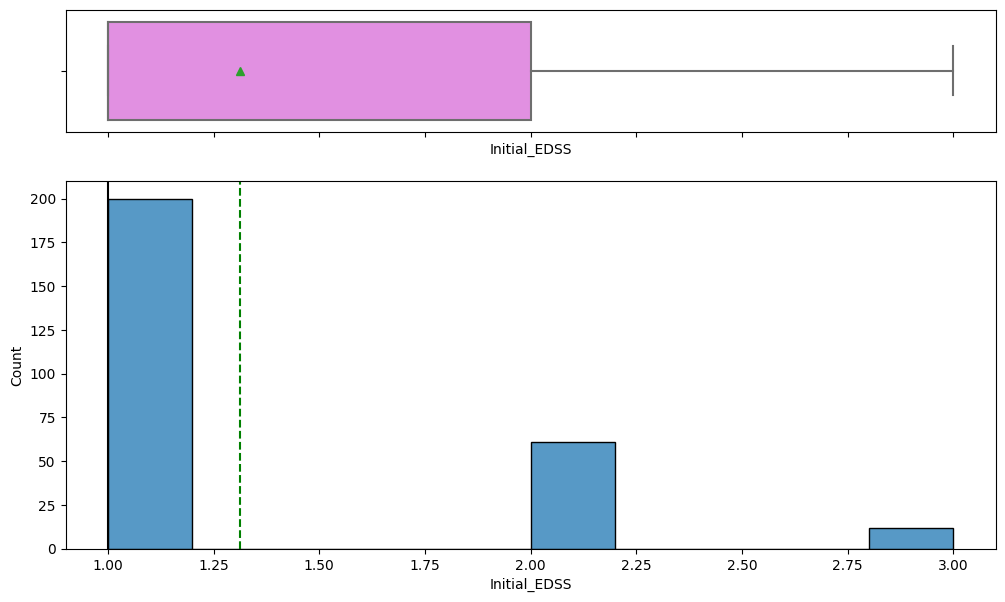

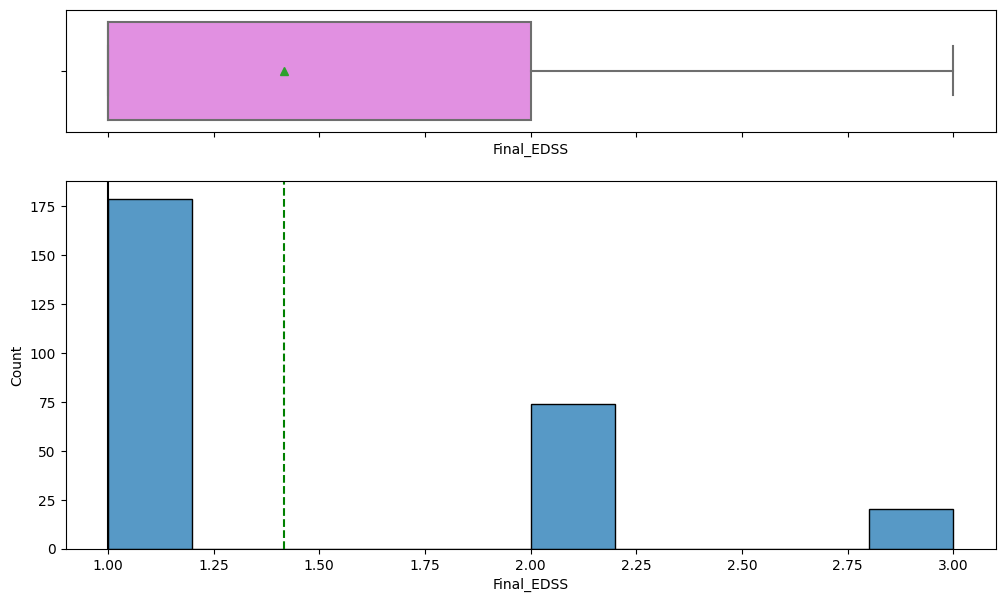

In [ ]:
# Creating them
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item)

In [ ]:
# Univariate Analysis for the categorical variables
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=11)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

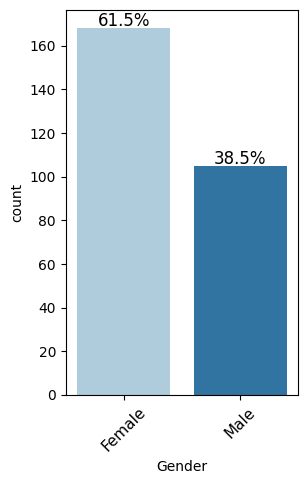

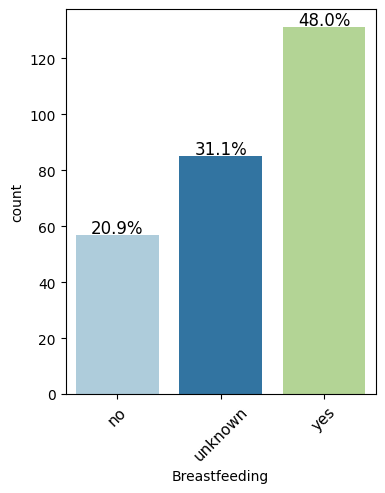

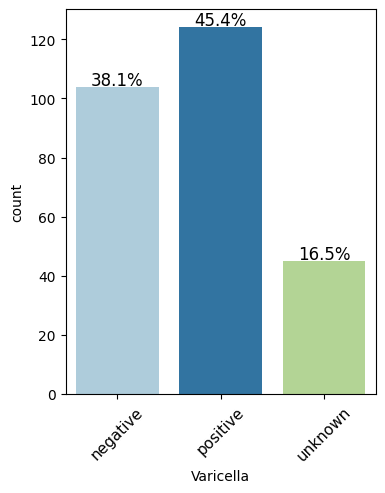

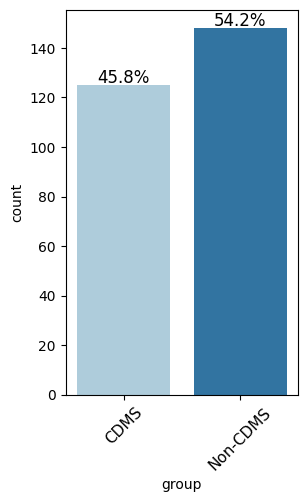

In [ ]:
cat_cols = data.select_dtypes(include='object').columns.tolist()

for item in cat_cols:
    labeled_barplot(data,item,perc=True)

Data Cleaning & Preprocessing

In [ ]:
# Removing Intial and Final EDSS since majority of their data is missing
df = df.drop(['Initial_EDSS','Final_EDSS'],axis=1)

In [ ]:
# Dropping the rest of the null values
df = df.dropna(axis=1)

In [ ]:
df.isnull().sum()

Gender                     0
Age                        0
Breastfeeding              0
Varicella                  0
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
group                      0
dtype: int64

In [ ]:
# Importing Packages used for modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Creating Training and Testing Dataset
# Creating the independent and dependent variables
X = df.drop('group',axis=1)
y = df['group']

# Creating the training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Creating a function for metrics
def model_performance_classification_sklearn(model,predictors,target):
    #Predicting using independent variables
    pred = model.predict(predictors)

    #Metrics used
    acc = accuracy_score(target,pred) #To compute the accuracy score
    recall= recall_score(target,pred) #To compute the recall score
    precision = precision_score(target,pred) #To compute the precision score
    f1 = f1_score(target,pred) #To predict the f-1 score

    #Creating the dataframe for the metrics
    df_perf = pd.DataFrame(
        {'Accuracy':acc,'Recall':recall,'Precision':precision,'F1':f1,},
                          index=[0],)

    return df_perf

In [ ]:
# Creating a function for the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Logistic Regression

In [ ]:
# Let's make a logistic regression model with hyperparameter tuning
lg = LogisticRegression(solver='liblinear',random_state=42)
lg_params = {'C':[0.01,0.1,1,10]}
lg_grid = GridSearchCV(estimator=lg,param_grid=lg_params,cv=5)
lg_grid.fit(X_train,y_train)
lg_best = lg_grid.best_estimator_

In [ ]:
# Looking at metrics for test set
lg_test = model_performance_classification_sklearn(lg_best,X_train,y_train)
print('\033[1m'+"\t\t Logistic Regression")
lg_test

		 Logistic Regression


,Accuracy,Recall,Precision,F1
0,0.793578,0.747475,0.787234,0.766839


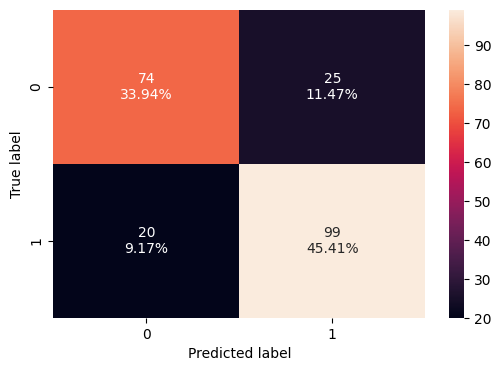

In [ ]:
# Looking at confusion matrix for test set
confusion_matrix_sklearn(lg_best,X_train,y_train)

Decision Tree

In [ ]:
# Let's make a decision tree model with hyperparameter tuning
dtree = DecisionTreeClassifier(random_state=42)
dtree_params = {'max_depth':[None,5,10,20],
                'min_samples_split':[2,5,10],
                'min_samples_leaf':[1,2,4]}
dtree_grid = GridSearchCV(dtree,dtree_params,cv=5)
dtree_grid.fit(X_train,y_train)
dtree_best = dtree_grid.best_estimator_

In [ ]:
# Testing set metrics
dtree_test = model_performance_classification_sklearn(dtree_best,X_train,y_train)
print('\033[1m'+"\t\t Decision Tree")
dtree_test

		 Decision Tree


,Accuracy,Recall,Precision,F1
0,0.876147,0.89899,0.839623,0.868293


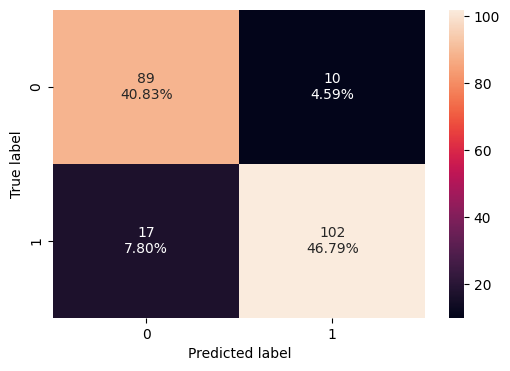

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(dtree_best,X_train,y_train)

Random Forest

In [ ]:
# Making a random forest model with hyperparameter tuning
random_forest = RandomForestClassifier(random_state=42)
forest_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10, 20],
                 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
forest_grid = GridSearchCV(estimator=random_forest, param_grid=forest_params, cv=5)
forest_grid.fit(X_train, y_train)
forest_best = forest_grid.best_estimator_

In [ ]:
# Test set metrics
rf_test = model_performance_classification_sklearn(forest_best,X_train,y_train)
print('\033[1m'+"\t\t Random Forest")
rf_test

		 Random Forest


,Accuracy,Recall,Precision,F1
0,0.917431,0.939394,0.885714,0.911765


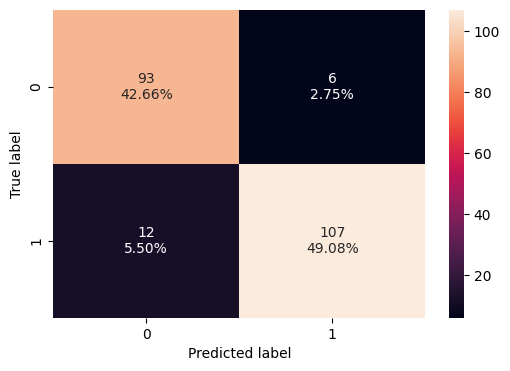

In [ ]:
# Confusion matrix
confusion_matrix_sklearn(forest_best,X_train,y_train)